In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
tf.test.is_gpu_available()

True

In [3]:
df=pd.read_csv('dataset.csv')
df.head()

,text,author
0,কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...,Humayun Ahmed
1,গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে। এই ফ্ল্...,Humayun Ahmed
2,আমাকে শোভা ডাকতে পারে না। আমাকে ডাকে– শো শো শো...,Humayun Ahmed
3,রান্না ভালো হয় নি। শোভা আপুর রান্নার হাত জঘন্...,Humayun Ahmed
4,অবশ্যই । দুপুরে তুমি খাবে। ছোট্ট একটা কাজ করতে...,Humayun Ahmed


In [4]:
df['author'].value_counts()

Shorot Chandro                 100
Sufia Kamal                    100
Promoth Chowdury               100
Humayun Ahmed                  100
MD Jafor Iqbal                 100
Robindronath Tagore            100
Bankimchandra Chattopadhyay    100
Sawkat Osman                   100
Bivutibhushon Bondopoddhay     100
Shomoresh Mojumdar             100
Syed Waliullah                 100
Taarashankar Bondopoddhay      100
Munir Chowdhury                100
Manik Bondopoddhay             100
Name: author, dtype: int64

## Preprocessing

In [5]:
import re
df['prep']=df.text.apply(lambda x: [i for i in re.sub(r'[^\u0980-\u09E3 A-Za-z]+', ' ', str(x)).split() if len(i) > 1])
df['clean_text']=df['prep'].apply(lambda x: " ".join(x))

In [6]:
df.head()

,text,author,prep,clean_text
0,কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...,Humayun Ahmed,"[কারওয়ান, বাজার, এলাকার, মাদক, ব্যবসা, নিয়ন্...",কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...
1,গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে। এই ফ্ল্...,Humayun Ahmed,"[গুলশান, এলাকার, একটা, ফ্যাট, সে, ভাড়া, করে, ...",গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে এই ফ্ল্য...
2,আমাকে শোভা ডাকতে পারে না। আমাকে ডাকে– শো শো শো...,Humayun Ahmed,"[আমাকে, শোভা, ডাকতে, পারে, না, আমাকে, ডাকে, শো...",আমাকে শোভা ডাকতে পারে না আমাকে ডাকে শো শো শো আ...
3,রান্না ভালো হয় নি। শোভা আপুর রান্নার হাত জঘন্...,Humayun Ahmed,"[রান্না, ভালো, হয়, নি, শোভা, আপুর, রান্নার, হ...",রান্না ভালো হয় নি শোভা আপুর রান্নার হাত জঘন্য...
4,অবশ্যই । দুপুরে তুমি খাবে। ছোট্ট একটা কাজ করতে...,Humayun Ahmed,"[অবশ্যই, দুপুরে, তুমি, খাবে, ছোট্ট, একটা, কাজ,...",অবশ্যই দুপুরে তুমি খাবে ছোট্ট একটা কাজ করতে পা...


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['clean_text'],df['author'],test_size=0.1,random_state=50,stratify=df['author'])

In [8]:
y_train.value_counts()

Robindronath Tagore            90
Bankimchandra Chattopadhyay    90
Sawkat Osman                   90
Bivutibhushon Bondopoddhay     90
Shorot Chandro                 90
Sufia Kamal                    90
Promoth Chowdury               90
Humayun Ahmed                  90
Shomoresh Mojumdar             90
MD Jafor Iqbal                 90
Syed Waliullah                 90
Taarashankar Bondopoddhay      90
Munir Chowdhury                90
Manik Bondopoddhay             90
Name: author, dtype: int64

In [9]:
y_test.value_counts()

Syed Waliullah                 10
Taarashankar Bondopoddhay      10
Sufia Kamal                    10
Bankimchandra Chattopadhyay    10
Promoth Chowdury               10
Humayun Ahmed                  10
Sawkat Osman                   10
Munir Chowdhury                10
Manik Bondopoddhay             10
Bivutibhushon Bondopoddhay     10
Shorot Chandro                 10
Shomoresh Mojumdar             10
Robindronath Tagore            10
MD Jafor Iqbal                 10
Name: author, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
y_train=L.fit_transform(y_train)
y_test=L.transform(y_test)

### Tokenization

In [11]:
vocab_size=20000
max_length=200

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OVV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [14]:
print(word_index)

{'<OVV>': 1, 'না': 2, 'করে': 3, 'সে': 4, 'তার': 5, 'যে': 6, 'আর': 7, 'আমি': 8, 'আমার': 9, 'কিন্তু': 10, 'কি': 11, 'এই': 12, 'হয়': 13, 'কথা': 14, 'একটা': 15, 'হয়ে': 16, 'থেকে': 17, 'আছে': 18, 'মনে': 19, 'নেই': 20, 'বলে': 21, 'সঙ্গে': 22, 'কী': 23, 'গেল': 24, 'কিছু': 25, 'হবে': 26, 'তা': 27, 'তুমি': 28, 'করতে': 29, 'নিয়ে': 30, 'ছিল': 31, 'এবং': 32, 'যায়': 33, 'তো': 34, 'দিয়ে': 35, 'তখন': 36, 'এক': 37, 'সেই': 38, 'আমাদের': 39, 'নয়': 40, 'আমরা': 41, 'কেন': 42, 'তোমার': 43, 'কাছে': 44, 'করিয়া': 45, 'বড়': 46, 'আবার': 47, 'কোনো': 48, 'যেন': 49, 'মধ্যে': 50, 'তিনি': 51, 'দিকে': 52, 'তাই': 53, 'করা': 54, 'খুব': 55, 'পারে': 56, 'যদি': 57, 'বলল': 58, 'নাই': 59, 'একটু': 60, 'জন্য': 61, 'থাকে': 62, 'সব': 63, 'বললেন': 64, 'একটি': 65, 'এমন': 66, 'মতো': 67, 'নি': 68, 'আমাকে': 69, 'আজ': 70, 'বললে': 71, 'হল': 72, 'কেউ': 73, 'এখন': 74, 'এসে': 75, 'বসে': 76, 'তাকে': 77, 'মা': 78, 'পর': 79, 'সময়': 80, 'ভাল': 81, 'ঠিক': 82, 'তাঁর': 83, 'চলে': 84, 'দেখে': 85, 'অনেক': 86, 'তারপর': 87, 'দিন': 88, 'হাত

In [15]:
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)

### Padding

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_train=pad_sequences(train_sequence,maxlen=max_length,truncating='pre',padding='post')
padded_test=pad_sequences(test_sequence,maxlen=max_length,truncating='pre',padding='post')

In [20]:
padded_test[2]

array([  521,    25,   252,  1193,     2,    10,   234,    30,     7,
        3570,   161,   892,   805,     2,   133,  1435,   113,   663,
          16,   500,   458,   249,   165,   165,   387,   805,     1,
           1,     3,   229,   106,    19,    13,  4808,    48,    15,
        6861,  3798,  3798,   456,     1,     3,   250,   696,   370,
          24,   521,   252,  1193,   168,   105,    38,     1,    75,
           1,     4,     5,   103,   193,     3,  1456,   103,   193,
         631,  1267,   805,   123,   250,   256,  3798,  3798,   168,
         949,   269,    82,     5,  2244,    44,    75,   598,   229,
         762,    33,     1,    77,   949,   269,   521,   116,  4517,
         311,     1,    35,   228,    85,    10,   892,   805,     2,
           5,    19,   134,   280,  5821,   416,     5,  3432,  7277,
         132,    73,   566,   238,  2406,    10,   151,   138,   140,
        7222,     2,   387,   805,     1,     1,     3,   598,   229,
         334,   522,

In [21]:
##Function for Results

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def results(model):
    pred=model.predict(padded_test)
    pred=pred.argmax(axis=1)
    ac=accuracy_score(y_test,pred)
    
    categories=list(range(14))
    t=list(L.inverse_transform(categories))
    cr=classification_report(y_test,pred,target_names=t)
    cm=confusion_matrix(y_test,pred)
    

    print(model)
    print('----------------------------------------------')
    print("Test Accuracy: ", ac)
    print('----------------------------------------------')
    print('classification report:\n ', cr)
    print('----------------------------------------------')
    
    p = pd.DataFrame(cm, index=list(L.inverse_transform(categories)), columns=list(L.inverse_transform(categories)))
    plt.figure(figsize=(12,8))
    sns.heatmap(p,annot=True,linewidths=1)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual",  fontsize=14)
    plt.savefig("CM_we.jpg", dpi=300, bbox_inches='tight')

## Model Training

In [46]:
#DNN
from tensorflow.keras.layers import LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    #tf.keras.layers.Bidirectional(LSTM(16)),
    tf.keras.layers.Conv1D(32,3, activation='elu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(14, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(padded_train, y_train, epochs=150 ,validation_split=0.10, batch_size=250 )

Train on 1134 samples, validate on 126 samples
Epoch 1/150
1134/1134 [==============================] - 1s 684us/sample - loss: 2.6377 - accuracy: 0.0811 - val_loss: 2.6368 - val_accuracy: 0.0714
Epoch 2/150
1134/1134 [==============================] - 0s 74us/sample - loss: 2.6361 - accuracy: 0.0741 - val_loss: 2.6345 - val_accuracy: 0.1190
Epoch 3/150
1134/1134 [==============================] - 0s 75us/sample - loss: 2.6312 - accuracy: 0.1155 - val_loss: 2.6317 - val_accuracy: 0.1429
Epoch 4/150
1134/1134 [==============================] - 0s 71us/sample - loss: 2.6277 - accuracy: 0.1138 - val_loss: 2.6280 - val_accuracy: 0.1190
Epoch 5/150
1134/1134 [==============================] - 0s 73us/sample - loss: 2.6221 - accuracy: 0.1340 - val_loss: 2.6223 - val_accuracy: 0.1349
Epoch 6/150
1134/1134 [==============================] - 0s 85us/sample - loss: 2.6131 - accuracy: 0.1658 - val_loss: 2.6142 - val_accuracy: 0.2222
Epoch 7/150
1134/1134 [==============================] - 0s 84us

Epoch 56/150
1134/1134 [==============================] - 0s 75us/sample - loss: 0.7667 - accuracy: 0.7372 - val_loss: 0.7124 - val_accuracy: 0.8175
Epoch 57/150
1134/1134 [==============================] - 0s 72us/sample - loss: 0.7505 - accuracy: 0.7443 - val_loss: 0.6852 - val_accuracy: 0.8333
Epoch 58/150
1134/1134 [==============================] - 0s 70us/sample - loss: 0.7368 - accuracy: 0.7310 - val_loss: 0.6592 - val_accuracy: 0.8413
Epoch 59/150
1134/1134 [==============================] - 0s 72us/sample - loss: 0.7411 - accuracy: 0.7522 - val_loss: 0.6507 - val_accuracy: 0.8254
Epoch 60/150
1134/1134 [==============================] - 0s 73us/sample - loss: 0.7543 - accuracy: 0.7354 - val_loss: 0.6573 - val_accuracy: 0.8254
Epoch 61/150
1134/1134 [==============================] - 0s 74us/sample - loss: 0.7038 - accuracy: 0.7716 - val_loss: 0.6398 - val_accuracy: 0.8492
Epoch 62/150
1134/1134 [==============================] - 0s 75us/sample - loss: 0.6780 - accuracy: 0.7531

Epoch 111/150
1134/1134 [==============================] - 0s 74us/sample - loss: 0.3978 - accuracy: 0.8642 - val_loss: 0.4358 - val_accuracy: 0.8730
Epoch 112/150
1134/1134 [==============================] - 0s 74us/sample - loss: 0.3586 - accuracy: 0.8845 - val_loss: 0.4215 - val_accuracy: 0.8730
Epoch 113/150
1134/1134 [==============================] - 0s 75us/sample - loss: 0.3838 - accuracy: 0.8792 - val_loss: 0.4175 - val_accuracy: 0.8889
Epoch 114/150
1134/1134 [==============================] - 0s 75us/sample - loss: 0.3837 - accuracy: 0.8633 - val_loss: 0.4547 - val_accuracy: 0.8730
Epoch 115/150
1134/1134 [==============================] - 0s 75us/sample - loss: 0.3679 - accuracy: 0.8810 - val_loss: 0.4804 - val_accuracy: 0.8651
Epoch 116/150
1134/1134 [==============================] - 0s 72us/sample - loss: 0.4016 - accuracy: 0.8589 - val_loss: 0.4333 - val_accuracy: 0.8571
Epoch 117/150
1134/1134 [==============================] - 0s 71us/sample - loss: 0.3798 - accuracy:

In [39]:
#model.save('stylometry.h5')

## Results

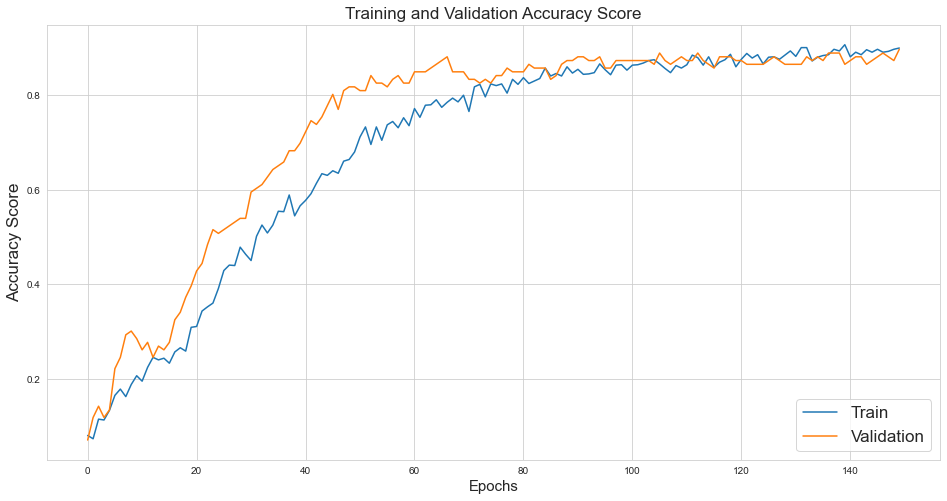

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Train', 'Validation'], fontsize=17 ,loc='lower right')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=17)
plt.title('Training and Validation Accuracy Score', fontsize=17)
plt.savefig("CNN.jpg", dpi=300, bbox_inches='tight')

----------------------------------------------
Test Accuracy:  0.8571428571428571
----------------------------------------------
classification report:
                               precision    recall  f1-score   support

Bankimchandra Chattopadhyay       1.00      1.00      1.00        10
 Bivutibhushon Bondopoddhay       1.00      1.00      1.00        10
              Humayun Ahmed       0.88      0.70      0.78        10
             MD Jafor Iqbal       0.89      0.80      0.84        10
         Manik Bondopoddhay       0.86      0.60      0.71        10
            Munir Chowdhury       0.60      0.60      0.60        10
           Promoth Chowdury       0.91      1.00      0.95        10
        Robindronath Tagore       0.71      0.50      0.59        10
               Sawkat Osman       0.91      1.00      0.95        10
         Shomoresh Mojumdar       1.00      1.00      1.00        10
             Shorot Chandro       1.00      1.00      1.00        10
                S

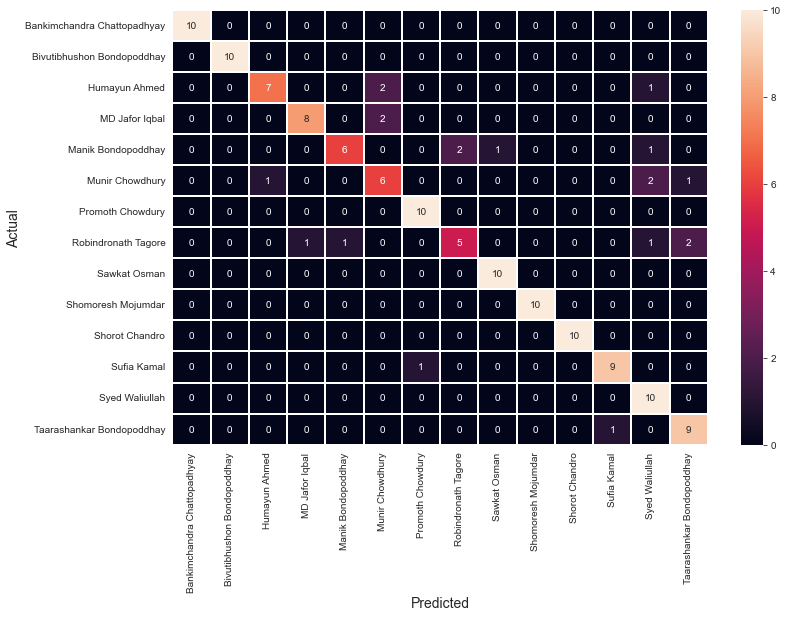

In [48]:
results(model)

In [53]:
model.save('CNN.h5')

## Prediction

In [49]:
new_text=["বাবা ফিরলেন রাত এগারোটায়। আমরা জেগে বসে আছি। অনেক লোকজন এসেছে। কেউ যাচ্ছে না। সবাই গম্ভীর মুখে বসে আছেন বসবার ঘরে। বাবা ঘরে ঢুকে এমন ভাব করলেন যেন কিছুই হয়নি। হাসিমুখে বললেন, ‘রেণু ঝগড়া করে সকালের ট্রেনে দিনাজপুর তার বাবার বাড়ি চলে গেছে। আমি ছিলাম না। ভাগ্যিস প্রণববাবু বুদ্ধি করে সঙ্গে গেছেন। নয় তো একা একা মেয়েছেলে এতদূর যাবে, দেখেন না অবস্থাটা, এই মেয়েজাতটার মতো রাগ আর কারোর নেই। হা-হা-হা। এদের নিয়েও চলে না, না নিয়েও চলে না।"]
                    

In [50]:
new_text_seq= tokenizer.texts_to_sequences(new_text)
new_pad=pad_sequences(new_text_seq,maxlen=max_length,truncating='post')

In [51]:
p=model.predict(new_pad)
p=p.argmax(axis=1)
L.inverse_transform(p)

array(['Sawkat Osman'], dtype=object)